<a href="https://colab.research.google.com/github/chingyunghuang/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C%EF%BC%8301_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
################ First Version Model #######################

In [ ]:
# preprocessing data

# one hot encoding for Pclass and Sex 
train_data1 = pd.concat([train_data, pd.get_dummies(train_data["Pclass"],prefix='Class')], axis=1)
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Sex"])], axis=1)

# fill na
train_data1[["Embarked"]] = train_data1[["Embarked"]].fillna('S')
train_data1[["Age"]] = train_data1[["Age"]].fillna(train_data1[["Age"]].mean())

# one hot encoding for Embarked
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Embarked"],prefix='Embarked')], axis=1)

train_data1.head()
train_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Class_1      891 non-null    uint8  
 13  Class_2      891 non-null    uint8  
 14  Class_3      891 non-null    uint8  
 15  female       891 non-null    uint8  
 16  male         891 non-null    uint8  
 17  Embarked_C   891 non-null    uint8  
 18  Embarked_Q   891 non-null    uint8  
 19  Embarked

Fare          0.257307
Embarked_S   -0.149683
Embarked_C    0.168240
Class_2       0.093349
Class_1       0.285904
Age          -0.069809
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
male         -0.543351
Class_3      -0.322308
female        0.543351
Survived      1.000000
Name: Survived, dtype: float64

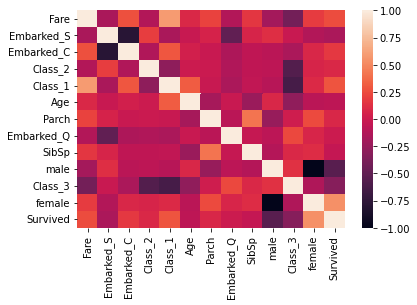

In [ ]:
columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})

# plot the heatmap
corr=train_data1[columns_X1].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。
train_data1[columns_X1].corr()['Survived']


In [ ]:
columns_X = list(set(train_data1.columns) - {'Survived','Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
columns_y = ['Survived']

train_X = train_data1[columns_X]
train_y = train_data1[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.77653631, 0.79213483, 0.78651685, 0.76966292, 0.83707865])

In [ ]:
########## Second Version Model ###############

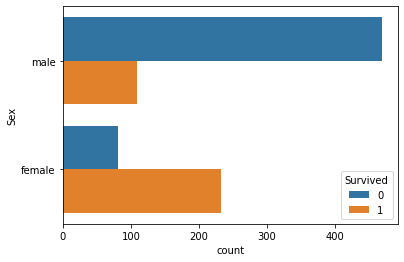

In [ ]:
train_data1['Sex']
sns.countplot(y=train_data1['Sex'],hue=train_data1.Survived)

<Figure size 432x288 with 0 Axes>

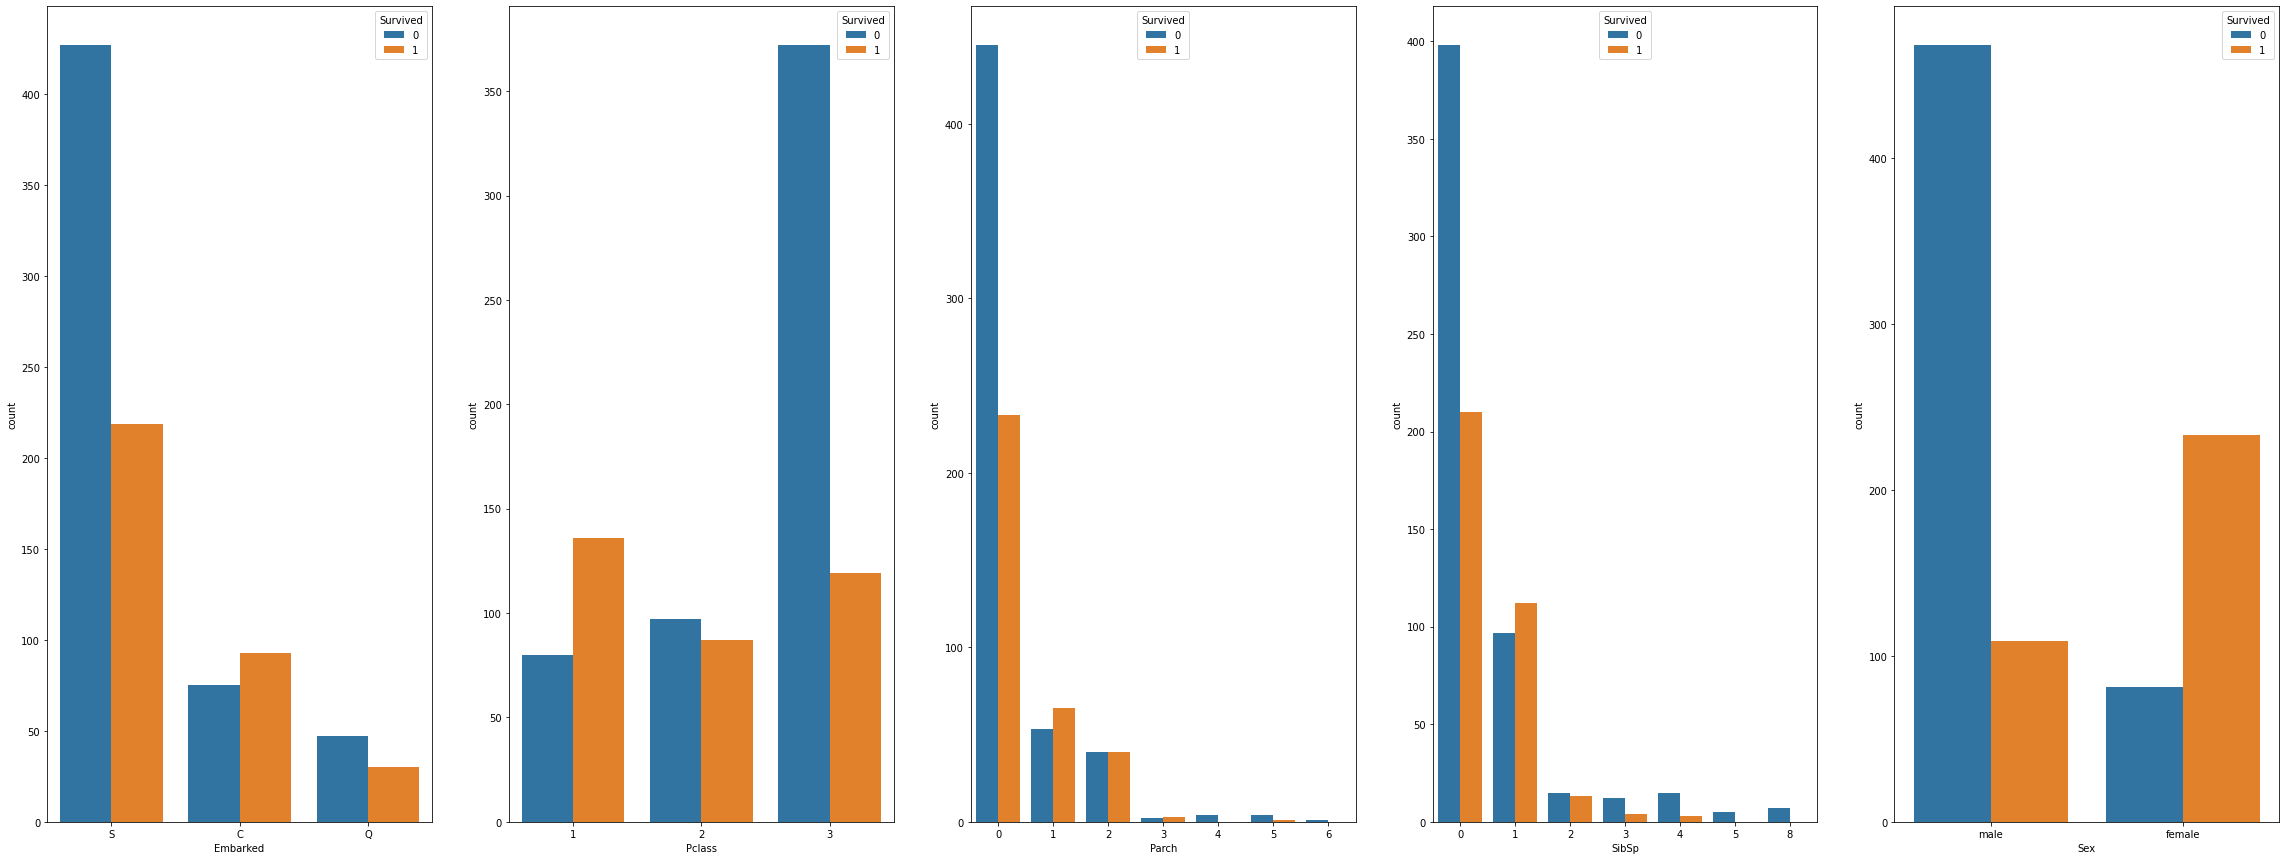

In [ ]:
# optimize the model

# 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？


  # Method: Correlation
  # 看到 是female與有存活有比較高的正相關 ，因此female這個feature 與「是否生存欄位」關係較大

columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
train_data1[columns_X1].corr()['Survived']

  # Method : Visualization
    # People who..
        # embarked from C
        # in Class 1
        # have 1 parents / children aboard the Titanic 
        # have 1 siblings / spouses aboard the Titanic
        # are female
    # have higher chance to survive

column_list=['Sex','Embarked','Pclass','Parch','SibSp']

plt.figure() 

fig, axs = plt.subplots(1,5,figsize=(40,15))
for i, col in enumerate( train_data1[column_list] ) :  
  sns.countplot(x=train_data1[col],hue=train_data1.Survived,ax=axs[i-1])   

plt.show()


# 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
  # Cabin 缺失值多且不重要，可以移除, Name 和 PassengerId 對於預測survived 與否沒有幫助，所以可以去除




In [3]:
## 3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。


train_data2=train_data
# fill the missing value of'Embarked'with the mode value
train_data2[["Embarked"]] = train_data2[["Embarked"]].fillna('S')
# fill the missing value of'age'with median age
train_data2[["Age"]] = train_data2[["Age"]].fillna(train_data2[["Age"]].mean())



In [4]:
# 4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

# one hot encoding for Pclass and Sex 

train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Pclass"],prefix='Class')], axis=1)
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Sex"])], axis=1)
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Embarked"],prefix='Embarked')], axis=1)
train_data2.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Class_1', 'Class_2',
       'Class_3', 'female', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [5]:
# add column : family_member , Fare_class

train_data2['family_member']=train_data2['SibSp']+train_data2['Parch']+1
label=['Cheap','Mid-cheap','Middle','Luxurious']
train_data2['fare_class']=pd.qcut(train_data2['Fare'],4,labels=label)
  # turn fareclass to dummy
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["fare_class"],prefix='Fare_')], axis=1)
train_data2.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Class_1', 'Class_2',
       'Class_3', 'female', 'male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'family_member', 'fare_class', 'Fare__Cheap', 'Fare__Mid-cheap',
       'Fare__Middle', 'Fare__Luxurious'],
      dtype='object')

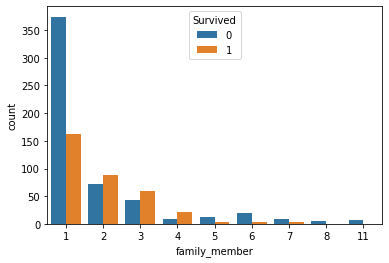

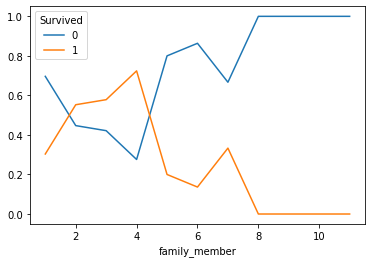

In [6]:
# visulaize the relationship between family member and survived 
# Finding: People who had 2~4 family members had a higher chance to survive

sns.countplot(x=train_data2['family_member'],hue=train_data2.Survived)

#visualize the distribution of survived and non survived per "# of family_member"
familySize_data=train_data2.groupby(['family_member','Survived']).count()['PassengerId']
unstack_familySize_data=familySize_data.unstack('Survived')
familySize_dist=unstack_familySize_data.div(unstack_familySize_data.sum(1),axis=0).fillna(0)
familySize_dist.plot()

In [7]:
# transform "family member" from numerical to categorical
def familySizeTransform(s):
  if s>=2 and s<5:
    return 3
  elif s==1 or (s>=5 and s<8):
    return 2
  else:
    return 1
# map the family member to category
train_data2['FamilySizeEncoding']=train_data2['family_member'].map(familySizeTransform)
#train_data2[['family_member','FamilySizeEncoding']][:10]

In [8]:
columns_X2 = list(set(train_data2.columns) - {'Survived','Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked','fare_class','family_member'})
columns_y2 = ['Survived']

train_X2 = train_data2[columns_X2]
train_y2= train_data2[columns_y2]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.7877095 , 0.79775281, 0.79213483, 0.78651685, 0.82022472])

In [ ]:
# Finding: After optimizing the model, we can find the following attributes that have relatively high correlation with "Survived" attribute
# Attribute such as ....
  # sex (male/female)
  # Pclass (3 & 1)
  # FamilySizeEncoding
  # Fare_Luxurious
  # Fare_cheap

abs(train_data2.corr()['Survived']).sort_values(ascending=False)

Survived              1.000000
male                  0.543351
female                0.543351
Pclass                0.338481
Class_3               0.322308
FamilySizeEncoding    0.289087
Class_1               0.285904
Fare                  0.257307
Fare__Luxurious       0.233638
Fare__Cheap           0.221610
Embarked_C            0.168240
Embarked_S            0.149683
Fare__Mid-cheap       0.095648
Class_2               0.093349
Fare__Middle          0.084239
Parch                 0.081629
Age                   0.069809
SibSp                 0.035322
family_member         0.016639
PassengerId           0.005007
Embarked_Q            0.003650
Name: Survived, dtype: float64

In [ ]:
##########   Model Building

In [9]:
# machine learning
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [10]:
# predict the model with the choosen attributes in train_data2

  # logistic regression 
log = LogisticRegression(random_state=0, max_iter=3000)
scores_1 = cross_val_score(log, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

  #Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

  # Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

  # KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

  # Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

  # RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, train_X2, train_y2.values.ravel(),cv=5,scoring='accuracy').mean()

#print the score

score=pd.DataFrame({'Model': ['logistic regression','Support Vector Machines','Decision Tree','KNN','Gaussian Naive Baye','RandomForestClassifier'],
              'Average Score':[scores_1,scores_2,scores_3,scores_4,scores_5,scores_6]})
score

,Model,Average Score
0,logistic regression,0.796868
1,Support Vector Machines,0.674616
2,Decision Tree,0.768834
3,KNN,0.703747
4,Gaussian Naive Baye,0.753211
5,RandomForestClassifier,0.803634


In [11]:
# Use GridSearchCV : 自動調參數的方法
# 調support vector machine 
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['linear']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X2, train_y2)
print(clf.best_params_)
scores_7 = cross_val_score(svc, train_X2, train_y2.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.5, 'gamma': 0.05, 'kernel': 'linear'}
0.674615529470843


In [24]:
# Use GridSearchCV : 自動調參數的方法
# 調knn
knn = KNeighborsClassifier(n_neighbors = 4)
Parameters = {
    'weights' : [ 'distance'],
    'leaf_size':[6]

}
clf= GridSearchCV(knn, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X2, train_y2)
print(clf.best_params_)
scores_8 = cross_val_score(knn, train_X2, train_y2.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_8)


{'leaf_size': 6, 'weights': 'distance'}
0.7048584520745715


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [25]:
models=pd.DataFrame({'Model': ['logistic regression','Support Vector Machines','Support Vector Machines(optimize)','Decision Tree','KNN','KNN(optimize)','Gaussian Naive Baye','RandomForestClassifier'],
              'Average Score':[scores_1,scores_2,scores_7,scores_3,scores_4,scores_8,scores_5,scores_6]})
models

,Model,Average Score
0,logistic regression,0.796868
1,Support Vector Machines,0.674616
2,Support Vector Machines(optimize),0.674616
3,Decision Tree,0.768834
4,KNN,0.703747
5,KNN(optimize),0.704858
6,Gaussian Naive Baye,0.753211
7,RandomForestClassifier,0.803634


**Pytorch**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X2, train_y2, test_size = 0.2)

print(X_train.shape) # (547, 15)
print(y_train.shape)
print(X_test.shape) # (137, 15)
print(y_test.shape)

import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(712, 17)
(712, 1)
(179, 17)
(179, 1)
(712, 2)
(179, 2)


In [29]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 150
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


 ===== done =====
[0.6174547672271729, 0.6173306107521057, 0.6168869733810425, 0.616148829460144, 0.6153766512870789, 0.6145666241645813, 0.6136452555656433, 0.6125571727752686, 0.6113114356994629, 0.6099711060523987, 0.6085752248764038, 0.6071174740791321, 0.6055852770805359, 0.6039749383926392, 0.6022921204566956, 0.6005498766899109, 0.5987668633460999, 0.5969647765159607, 0.5951659679412842, 0.5933896899223328, 0.5916486978530884, 0.5899471044540405, 0.5882788300514221, 0.5866329073905945, 0.5850072503089905, 0.5834174752235413, 0.5818828344345093, 0.5804035067558289, 0.5789598822593689, 0.5775319337844849, 0.5761184096336365, 0.5747391581535339, 0.5734187364578247, 0.5721758008003235, 0.5710218548774719, 0.5699594020843506, 0.5689786672592163, 0.5680421590805054, 0.5671736001968384, 0.5663878321647644, 0.5656552314758301, 0.5649586319923401, 0.564288318157196, 0.5636383891105652, 0.563005805015564, 0.5623897314071655, 0.5617897510528564, 0.5612053871154785, 0.5606365203857422, 0.56

Text(0, 0.5, 'BCE Loss')

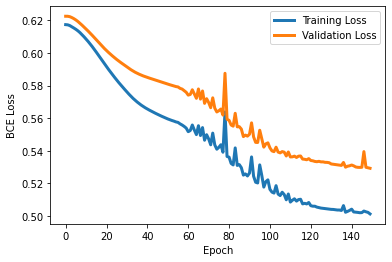

In [30]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [31]:
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


0.7932960893854749